In [1]:
# IMPORT MODULES 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.cm import ScalarMappable
import numpy as np 
import datetime

In [54]:
# OPEN THE AASIAAT EGEDESMINDE MONTHLY TEMPERATURE CSV. SUBSET TO 1991-2023 AND REMOVE NaN VALUES (999.9)
ae_temperature = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/aasiaat_egedesminde_temps.csv')
ae_temperature = ae_temperature[(ae_temperature['YEAR'] >= 1991) & (ae_temperature['YEAR'] <= 2022)]
ae_temperature.replace(999.9, np.nan, inplace=True)

# CALCULATE MEAN MONTHLY TEMPERATURE BETWEEN 1991 AND 2018 
ae_temp_1991_2018 = ae_temperature[(ae_temperature['YEAR'] >= 1991) & (ae_temperature['YEAR'] <= 2017)]
mean_temp_1991_2018 = ae_temp_1991_2018[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()

# FOR 2018-2023, CALCULATE THE MONTHLY ANOMALY, RELATIVE TO THE 1991-2018 MEAN
ae_temp_2018_to_2023 = ae_temperature[ae_temperature['YEAR'].isin([2018, 2019, 2020, 2021, 2022])]
anomaly_2018_2023 = ae_temp_2018_to_2023[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].copy()
for month in ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']:
    anomaly_2018_2023[month] -= mean_temp_1991_2018[month]

# REFORMAT THE MONTH HEADINGS TO DATETIME OBJECTS 
months = pd.to_datetime(anomaly_2018_2023.columns[1:], format='%b')
anomaly_2018_2023.columns = ['YEAR'] + months.strftime('%b').tolist()

# FLATTEN THE DATAFRAME TO TWO COLUMNS (DATE AND ANOMALY)
anomaly_2018_2023 = pd.melt(anomaly_2018_2023, id_vars=['YEAR'], var_name='Month', value_name='Anomaly')
anomaly_2018_2023['DATE'] = pd.to_datetime(anomaly_2018_2023['YEAR'].astype(str) + '-' + anomaly_2018_2023['Month'], format='%Y-%b')
anomaly_2018_2023 = anomaly_2018_2023[['DATE', 'Anomaly']]
anomaly_2018_2023 = anomaly_2018_2023.sort_values(by='DATE')

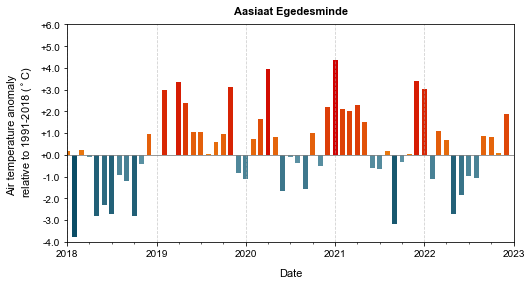

In [53]:
# PLOT AIR TEMPERATURE ANOMALY GRAPH FOR AASIAAT EGEDESMINDE.
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) 
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
plt.title('Aasiaat Egedesminde', pad=10, fontsize=11, fontweight='bold')
plt.ylabel("Air temperature anomaly \n relative to 1991-2018 ($^\circ$C)", labelpad=6, fontsize=11)
plt.xlabel('Date', labelpad=10, fontsize=11)

# FORMAT THE X-AXIS TICK LIMITS  
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

# SET THE Y AXIS TICK LIMITS, ADDING A '+' BEFORE POSITIVE VALUES 
plt.ylim(-4, 6)
plt.yticks(np.arange(-4, 6+1, 1))
def format_positive(value, tick_number):
    if value >= 0:
        return f'+{value:.1f}'
    else:
        return f'{value:.1f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_positive))

# DEFINE A CUSTOM BLUE & RED COLOUR MAP 
blue_cmap = LinearSegmentedColormap.from_list('custom_blue', ['#0a4c65', '#caf0f8'], N=256)
red_cmap = LinearSegmentedColormap.from_list('custom_red', ['#ffe81a', '#d00000'], N=256)
norm = plt.Normalize(anomaly_2018_2023['Anomaly'].min(), anomaly_2018_2023['Anomaly'].max())

# PLOT THE DATA WITH THE CUSTOM COLOUR MAPS
for index, row in anomaly_2018_2023.iterrows():
    anomaly_value = row['Anomaly']
    if not pd.isna(anomaly_value):
        color = red_cmap(norm(anomaly_value)) if anomaly_value >= 0 else blue_cmap(norm(anomaly_value))
        ax.bar(row['DATE'], anomaly_value, width=20, color=color)

plt.show()

In [55]:
# OPEN THE ILLULISAT MITTARFIK MONTHLY TEMPERATURE CSV. SUBSET TO 1991-2020 AND REMOVE NaN VALUES (999.9)
im_temperature = pd.read_csv('R:/JAKOBSHAVN/CODE/github/jakobshavn_isbrae/data/illulissat_mittarfik_temps.csv')
im_temperature = im_temperature[(im_temperature['YEAR'] >= 1991) & (im_temperature['YEAR'] <= 2020)]
im_temperature.replace(999.9, np.nan, inplace=True)

# CALCULATE MEAN MONTHLY TEMPERATURE BETWEEN 1991 AND 2018 
im_temp_1991_2018 = im_temperature[(im_temperature['YEAR'] >= 1991) & (im_temperature['YEAR'] <= 2017)]
im_temp_1991_2018 = im_temp_1991_2018[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].mean()

# FOR 2018-2021, CALCULATE THE MONTHLY ANOMALY, RELATIVE TO THE 1991-2018 MEAN
im_temp_2018_to_2023 = im_temperature[im_temperature['YEAR'].isin([2018, 2019, 2020, 2021, 2022])]
im_anomaly_2018_2023 = im_temp_2018_to_2023[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].copy()
for month in ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']:
    im_anomaly_2018_2023[month] -= im_temp_1991_2018[month]

# REFORMAT THE MONTH HEADINGS TO DATETIME OBJECTS 
months = pd.to_datetime(im_anomaly_2018_2023.columns[1:], format='%b')
im_anomaly_2018_2023.columns = ['YEAR'] + months.strftime('%b').tolist()

# FLATTEN THE DATAFRAME TO TWO COLUMNS (DATE AND ANOMALY)
im_anomaly_2018_2023 = pd.melt(im_anomaly_2018_2023, id_vars=['YEAR'], var_name='Month', value_name='Anomaly')
im_anomaly_2018_2023['DATE'] = pd.to_datetime(im_anomaly_2018_2023['YEAR'].astype(str) + '-' + im_anomaly_2018_2023['Month'], format='%Y-%b')
im_anomaly_2018_2023 = im_anomaly_2018_2023[['DATE', 'Anomaly']]
im_anomaly_2018_2023 = im_anomaly_2018_2023.sort_values(by='DATE')

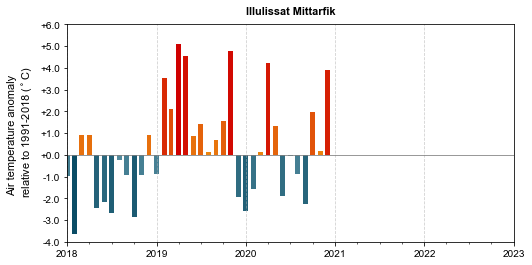

In [18]:
# PLOT AIR TEMPERATURE ANOMALY GRAPH FOR ILLILISSAT MITTARFIK
plt.rcParams["font.family"] = "Arial"
fig, ax = plt.subplots(figsize=(8, 4))
ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) 
plt.grid(axis = 'x', alpha=0.6, linestyle='--')
plt.title('Illulissat Mittarfik', pad=10, fontsize=11, fontweight='bold')
plt.ylabel("Air temperature anomaly \n relative to 1991-2018 ($^\circ$C)", labelpad=6, fontsize=11)
plt.xlabel('Date', labelpad=10, fontsize=11)

# FORMAT THE X-AXIS TICK LIMITS  
year_locator = mdates.YearLocator(base=1, month=1, day=1)
ax.xaxis.set_major_locator(year_locator)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
plt.xlim(min_x_value, max_x_value)
three_month_intervals = mdates.MonthLocator(interval=3)
ax.xaxis.set_minor_locator(three_month_intervals)

# SET THE Y AXIS TICK LIMITS, ADDING A '+' BEFORE POSITIVE VALUES 
plt.ylim(-4, 6)
plt.yticks(np.arange(-4, 6+1, 1))
def format_positive(value, tick_number):
    if value >= 0:
        return f'+{value:.1f}'
    else:
        return f'{value:.1f}'
ax.yaxis.set_major_formatter(ticker.FuncFormatter(format_positive))

# DEFINE A CUSTOM BLUE & RED COLOUR MAP 
blue_cmap = LinearSegmentedColormap.from_list('custom_blue', ['#0a4c65', '#caf0f8'], N=256)
red_cmap = LinearSegmentedColormap.from_list('custom_red', ['#ffe81a', '#d00000'], N=256)
norm = plt.Normalize(im_anomaly_2018_2023['Anomaly'].min(), im_anomaly_2018_2023['Anomaly'].max())

# PLOT THE DATA WITH THE CUSTOM COLOUR MAPS
for index, row in im_anomaly_2018_2023.iterrows():
    anomaly_value = row['Anomaly']
    if not pd.isna(anomaly_value):
        color = red_cmap(norm(anomaly_value)) if anomaly_value >= 0 else blue_cmap(norm(anomaly_value))
        ax.bar(row['DATE'], anomaly_value, width=20, color=color)

plt.show()

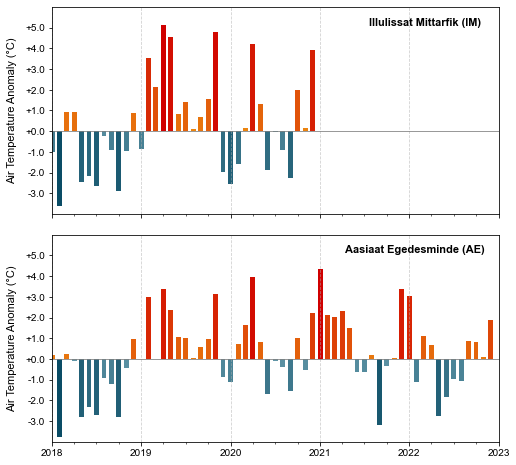

In [96]:
# COMBINE THE TWO ABOVE PLOTS INTO ONE FIGURE 
plt.rcParams["font.family"] = "Arial"
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
plt.subplots_adjust(hspace=0.1)

# FUNCTION TO FORMAT DATE TICKS
def format_date_ticks(ax):
    year_locator = mdates.YearLocator(base=1, month=1, day=1)
    ax.xaxis.set_major_locator(year_locator)
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    min_x_value = pd.to_datetime('2018-01-01', format='%Y-%m-%d')
    max_x_value = pd.to_datetime('2023-01-01', format='%Y-%m-%d')
    ax.set_xlim(min_x_value, max_x_value)
    three_month_intervals = mdates.MonthLocator(interval=3)
    ax.xaxis.set_minor_locator(three_month_intervals)

# PLOT FOR ILLULISSAT MITTARFIK
ax1.text(0.96, 0.95, 'Illulissat Mittarfik (IM)', transform=ax1.transAxes,
         fontsize=11, fontweight='bold', ha='right', va='top')
ax1.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) 
ax1.grid(axis='x', alpha=0.6, linestyle='--')
ax1.set_ylabel("Air Temperature Anomaly (\u00B0C)", labelpad=8, fontsize=11)
format_date_ticks(ax1)

ax1.set_ylim(-4, 6)
ax1.set_yticks(np.arange(-3, 5+1, 1))
def format_positive(value, tick_number):
    if value >= 0:
        return f'+{value:.1f}'
    else:
        return f'{value:.1f}'
ax1.yaxis.set_major_formatter(ticker.FuncFormatter(format_positive))

blue_cmap = LinearSegmentedColormap.from_list('custom_blue', ['#0a4c65', '#caf0f8'], N=256)
red_cmap = LinearSegmentedColormap.from_list('custom_red', ['#ffe81a', '#d00000'], N=256)
norm = plt.Normalize(im_anomaly_2018_2023['Anomaly'].min(), im_anomaly_2018_2023['Anomaly'].max())

for index, row in im_anomaly_2018_2023.iterrows():
    anomaly_value = row['Anomaly']
    if not pd.isna(anomaly_value):
        color = red_cmap(norm(anomaly_value)) if anomaly_value >= 0 else blue_cmap(norm(anomaly_value))
        ax1.bar(row['DATE'], anomaly_value, width=20, color=color)
ax1.set_xticklabels([])


# PLOT FOR AASIAAT EGEDESMINDE
ax2.text(0.97, 0.95, 'Aasiaat Egedesminde (AE)', transform=ax2.transAxes,
         fontsize=11, fontweight='bold', ha='right', va='top')
ax2.axhline(y=0, color='gray', linestyle='-', linewidth=0.8) 
ax2.grid(axis='x', alpha=0.6, linestyle='--')
ax2.set_ylabel("Air Temperature Anomaly (\u00B0C)", labelpad=8, fontsize=11)
format_date_ticks(ax2)

blue_cmap = LinearSegmentedColormap.from_list('custom_blue', ['#0a4c65', '#caf0f8'], N=256)
red_cmap = LinearSegmentedColormap.from_list('custom_red', ['#ffe81a', '#d00000'], N=256)
norm = plt.Normalize(anomaly_2018_2023['Anomaly'].min(), anomaly_2018_2023['Anomaly'].max())

# PLOT THE DATA WITH THE CUSTOM COLOUR MAPS
for index, row in anomaly_2018_2023.iterrows():
    anomaly_value = row['Anomaly']
    if not pd.isna(anomaly_value):
        color = red_cmap(norm(anomaly_value)) if anomaly_value >= 0 else blue_cmap(norm(anomaly_value))
        ax2.bar(row['DATE'], anomaly_value, width=20, color=color)

format_date_ticks(ax2)
ax2.set_ylim(-4, 6)
ax2.set_yticks(np.arange(-3, 5+1, 1))
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(format_positive))

plt.show()